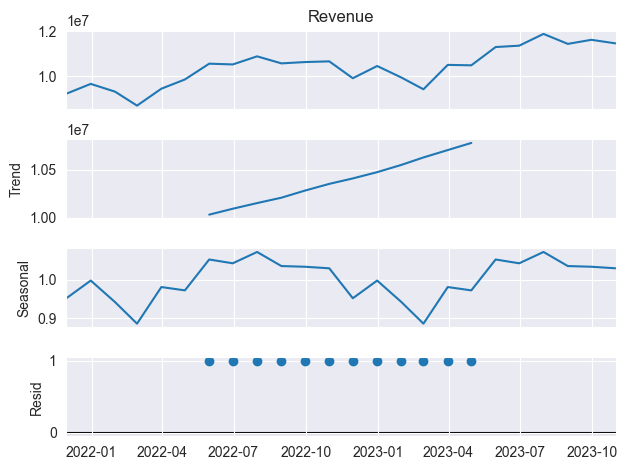

In [23]:
# Load the dataset to analyze its trend and seasonality
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Reading the dataset
file_path = 'data/Dataset1.csv'
df = pd.read_csv(file_path)

# Convert 'Date_Year' and 'Date_MonthName' to datetime and set as index
df['DateTime'] = pd.to_datetime(df['Date_Year'].astype(str) + df['Date_MonthName'], format='%Y%B')
df.set_index('DateTime', inplace=True)

# Aggregate revenue by month
monthly_revenue = df['Revenue'].resample('M').sum()

# Decomposing the time series
result = seasonal_decompose(monthly_revenue, model='multiplicative')  # Try model='multiplicative' if needed

# Plotting the decomposed time series components
result.plot()
plt.show()



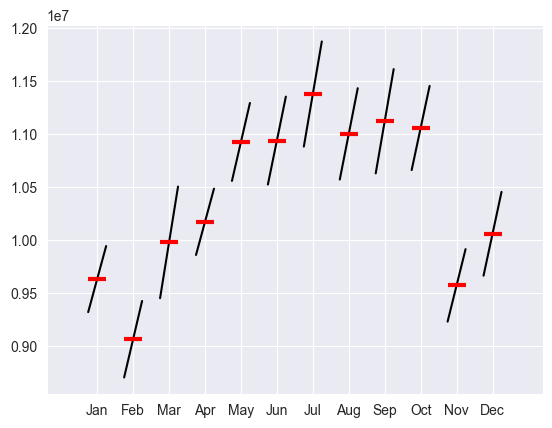

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv('data/Dataset1.csv')
df['DateTime'] = pd.to_datetime(df['Date_Year'].astype(str) + ' ' + df['Date_MonthName'], format='%Y %B')
df.set_index('DateTime', inplace=True)
monthly_revenue = df['Revenue'].resample('M').sum()

from statsmodels.graphics.tsaplots import month_plot

# Assuming the data has monthly frequency
month_plot(monthly_revenue)
plt.show()


In [39]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
df = pd.read_csv('data/Dataset1.csv')  # Replace with the actual file path

# Convert 'Date_Year' and 'Date_MonthName' to datetime and set as index
df['DateTime'] = pd.to_datetime(df['Date_Year'].astype(str) + ' ' + df['Date_MonthName'], format='%Y %B')
df.set_index('DateTime', inplace=True)

# Aggregate revenue by month
monthly_revenue = df['Revenue'].resample('M').sum()

# Extracting month from index for grouping
months = monthly_revenue.index.month

# Calculating within-group and between-group variance
within_variance = monthly_revenue.groupby(months).var()
between_variance = monthly_revenue.var()

# Calculating the F-Statistic
f_statistic, p_value = stats.f_oneway(*[group for name, group in monthly_revenue.groupby(months)])

print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")


F-Statistic: 3.380703273950374, P-Value: 0.02344046208280339


## Interpretation:
- The relatively higher F-Statistic suggests that the revenue varies significantly across different months.
- The P-Value being lower than 0.05 indicates that this variation is statistically significant. 

This means that the differences in revenue between months are not just random fluctuations; they are likely due to actual seasonal effects.

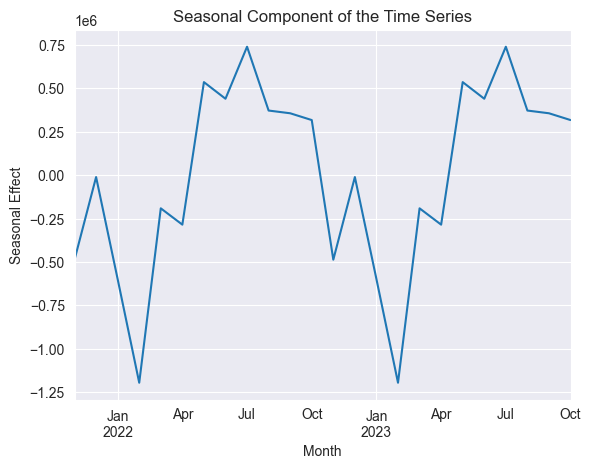

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
result = seasonal_decompose(monthly_revenue, model='additive')  # or 'multiplicative'

# Plot the seasonal component
result.seasonal.plot()
plt.title('Seasonal Component of the Time Series')
plt.xlabel('Month')
plt.ylabel('Seasonal Effect')
plt.show()


This plot will show you the repeating pattern of the seasonal effect across your data. 
Peaks and troughs in this plot indicate months with higher and lower revenue, respectively.

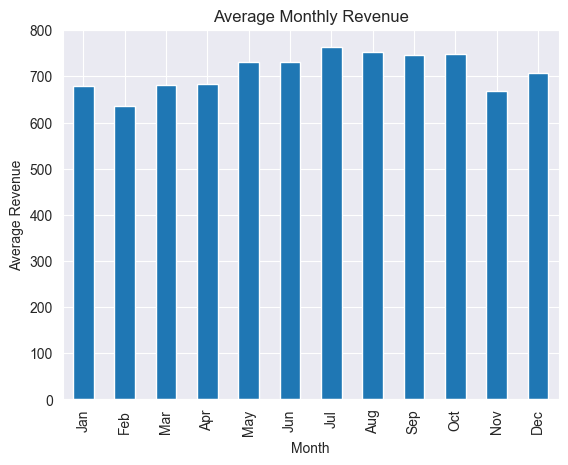

In [41]:
monthly_averages = df.groupby(df.index.month)['Revenue'].mean()

monthly_averages.plot(kind='bar')
plt.title('Average Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


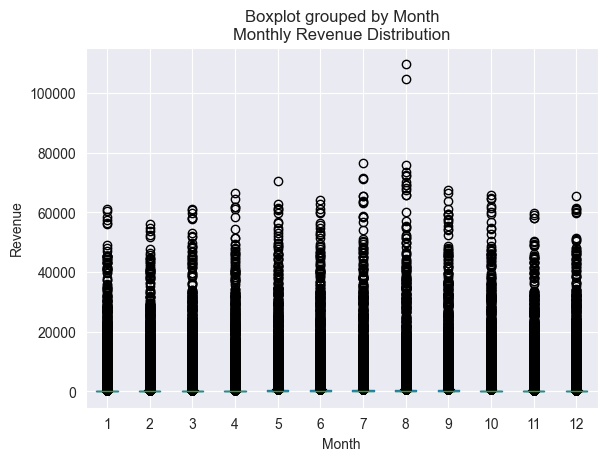

In [42]:
df['Month'] = df.index.month
df.boxplot(column='Revenue', by='Month')
plt.title('Monthly Revenue Distribution')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()
